# File input/output with scipy.io

* Loading and saving matlab filese

In [2]:
import numpy as np
from scipy import io as spio

a = np.ones((3,3))
spio.savemat('file.mat', {'a':a}) ## savemat expects a dictionary

data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

* Reading from tab-delimited files

In [3]:
import numpy as np
data = np.genfromtxt('input.tsv', dtype=['S3', 'i8', 'i8', 'S10'],
                    delimiter='\t', names=True)
data

array([(b'HSV', 21, 11, b'My favorit'), (b'FCB', 20, 10, b'Well, o.k.'),
       (b'BVB', 19, 11, b"It's cool!")],
      dtype=[('Team', 'S3'), ('Score', '<i8'), ('Goals', '<i8'), ('Note', 'S10')])

# Special functions: _scipy.special_

Special functions are transcendental functions. I will explore their properties later.

* [Bessel function](https://en.wikipedia.org/wiki/Bessel_function), such as _scipy.special.jn_
* [Elliptic function](https://en.wikipedia.org/wiki/Elliptic_function), such as _scipy.special.ellipj_
* [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), such as _scipy.special.gamma_ and _scipy.special.gammaln_.
* [Error function](http://en.wikipedia.org/wiki/Error_function), or Erf, the area under a Gausian curve, _scipy.special.erf_.

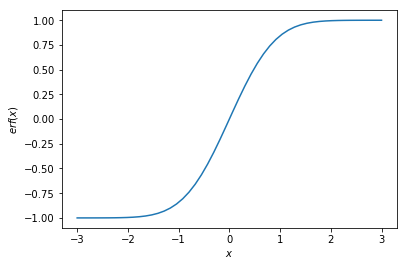

In [4]:
from scipy import special
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.show()

# Linear algebra

The module _scipy.linalg_ provides standard linear algebra operations.

* Determinant of a square matrix

In [5]:
from scipy import linalg

arr = np.array([[5,6],
                [1,2]])
linalg.det(arr)

4.0

In [6]:
arr2 = np.array([[3,4],
                 [6,8]])
linalg.det(arr2)

0.0

* Inverse of a square matrix

In [7]:
arr = np.array([[1,2],
                [3,4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [8]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

* Singular-value decomposition

In [9]:
arr = np.arange(9).reshape((3,3)) + np.diag([1,0,1])
arr

array([[1, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [10]:
urr, spec, vharr = linalg.svd(arr)
## array spectrum (eigenvectors)
spec

array([ 14.88982544,   0.45294236,   0.29654967])

In [11]:
## verify the SVD decomposition
sarr = np.diag(spec)
svd_mat = urr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

# Fast Fourier Transformations (FFT)

In [12]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi/period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)
    
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

pidxs = np.where(sample_freq>0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

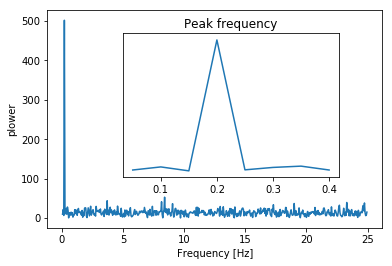

In [13]:
## visualise the signal FFT
import pylab as pl

pl.figure()
pl.plot(freqs, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
pl.title('Peak frequency')
pl.plot(freqs[:8], power[:8])
pl.setp(axes, yticks=[])
pl.show()

In [14]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)

True

/Users/FamilieZhang/Software/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


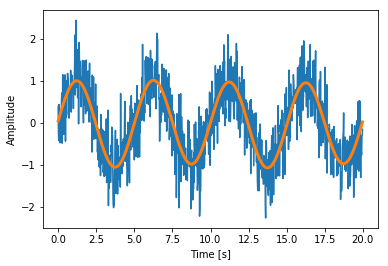

In [15]:
## remove high-frequency noise
sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)

import pylab as plt
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

## Crude periodicity

/Users/FamilieZhang/Software/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


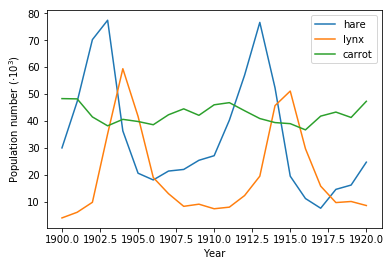

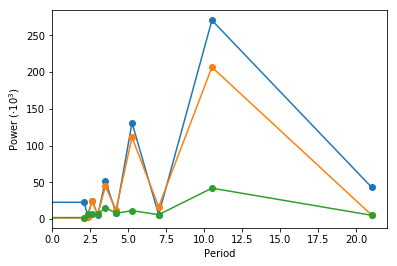

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("../1.3/data/populations.txt")
years = data[:,0]
populations = data[:,1:]

ft_populations = np.fft.fft(populations, axis=0)
frequences = np.fft.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequences

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)')
plt.legend(['hare','lynx','carrot'], loc=1)

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o-')
plt.xlim(0,22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')

plt.show()

# There's probably a period of around 10 years (obvious from the
# plot), but for this crude a method, there's not enough data to say
# much more.


## Gaussian blur

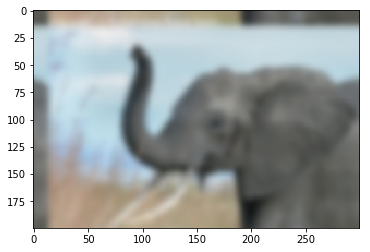

In [17]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

## read image
img = plt.imread('./elephant.png')

## 1D guassian convolution model
t = np.linspace(-10, 10, 30)
bump = np.exp(-.1*t**2)
bump /= np.trapz(bump) ## normalise the integral to 1

## np.trapz: Integrate along the given axis using the composite trapezoidal rule.

## make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis,:]

## FFT
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0,1))

## convolve
img_ft = fftpack.fft2(img, axes=(0,1))
img2_ft = kernel_ft[:,:, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0,1)).real

## clip values to range
img2 = np.clip(img2, 0, 1)

## plot output
plt.imshow(img2)
plt.show()

## Moon landing

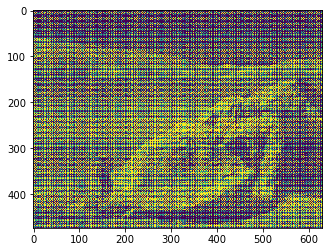

In [21]:
img = plt.imread('./moonlanding.png')

plt.imshow(img)
plt.show()

/Users/FamilieZhang/Software/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


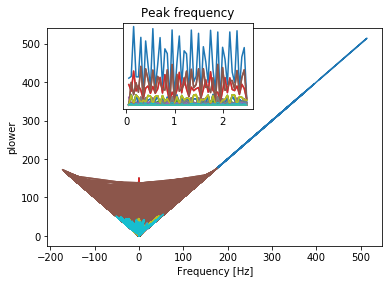

In [33]:
img_fft = fftpack.fft(img)

power = np.abs(img_fft)

pl.figure()
pl.plot(img_fft, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.6, 0.3, 0.3])
pl.title('Peak frequency')
pl.plot(freqs[:20], power[:20])
pl.setp(axes, yticks=[])
pl.show()

# Optimization

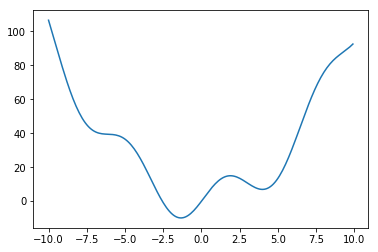

In [35]:
from scipy import optimize

def fun(x):
    return x ** 2 + np.sin(x) * 12

x = np.arange(-10, 10, 0.1)
plt.plot(x, fun(x))
plt.show()

In [36]:
## gradient descent with BFGS
optimize.fmin_bfgs(fun, 0)

Optimization terminated successfully.
         Current function value: -9.886369
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7


array([-1.34475105])

In [38]:
## ATTENTION: local maxima possible
optimize.fmin_bfgs(fun, 3, disp=0)

array([ 3.98582594])

In [39]:
## basin hopping: global search
optimize.basinhopping(fun, 0)

                        fun: -9.886369013642671
 lowest_optimization_result:       fun: -9.886369013642671
 hess_inv: array([[ 0.07303684]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.34475105])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1524
                        nit: 100
                       njev: 508
                          x: array([-1.34475105])

In [42]:
## Local minimal with optimize.fminbound
xmin_local = optimize.fminbound(fun, 0, 10)
xmin_local

3.9858256387196884

## Find roots

Use optimize.root to identify roots of a function will only reveal one root near the initial guess. See the example below

In [43]:
## find roots
root = optimize.root(fun, 1) ## 1: initial guess
root

    fjac: array([[-1.]])
     fun: array([ 0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  1.26649153e-30])
       r: array([-12.])
  status: 1
 success: True
       x: array([ 0.])

In [45]:
## another root
root2 = optimize.root(fun, -3)
root2

    fjac: array([[-1.]])
     fun: array([  1.32960309e-12])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([ -2.28508714e-07])
       r: array([ 15.16903836])
  status: 1
 success: True
       x: array([-2.56255081])

## Curve fitting

In [48]:
xdata = np.linspace(-10, 10, num=200)
ydata = fun(xdata) + np.random.randn(xdata.size)
def fun2(x, a, b):
    return a * x**2 + b * np.sin(x)

fitInit = [1,1]
params, params_covariance = optimize.curve_fit(fun2, xdata, ydata, fitInit)

In [49]:
params_covariance

array([[  2.15058965e-06,  -3.40725486e-13],
       [ -3.40725486e-13,   9.21161505e-03]])

In [50]:
params

array([  1.00005782,  12.12100444])